In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
train=pd.read_csv("train.csv")

In [189]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [191]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# univariate Analysis

In [192]:
cat=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

In [193]:
num=set(train.columns)-set(cat)

In [194]:
num

{'Item_Identifier',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Establishment_Year'}

In [195]:
train[num].describe()

,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Outlet_Sales,Item_MRP
count,8523.000000,7060.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,12.857645,1997.831867,2181.288914,140.992782
std,0.051598,4.643456,8.371760,1706.499616,62.275067
min,0.000000,4.555000,1985.000000,33.290000,31.290000
25%,0.026989,8.773750,1987.000000,834.247400,93.826500
50%,0.053931,12.600000,1999.000000,1794.331000,143.012800
75%,0.094585,16.850000,2004.000000,3101.296400,185.643700
max,0.328391,21.350000,2009.000000,13086.964800,266.888400


In [196]:
# function for count of categories 
def count_values(data,cat):
    for i in cat:
        print(data[i].value_counts())

In [197]:
count_values(train,cat)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocer

In [198]:
# function to replace the values
def replace(data,col,old,new):
    data[col] = data[col].replace([old],new)

In [199]:
replace(train,"Item_Fat_Content","LF","Low Fat")

In [200]:
replace(train,"Item_Fat_Content","low fat","Low Fat")

In [201]:
replace(train,"Item_Fat_Content","reg","Regular")

In [202]:
count_values(train,cat)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Su

In [203]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Plots 

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Weight'>

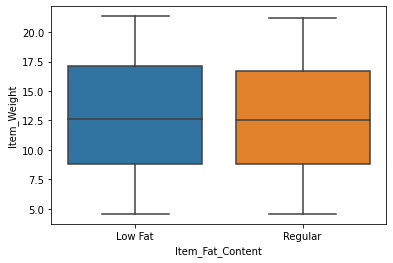

In [204]:
sns.boxplot("Item_Fat_Content","Item_Weight",data=train)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

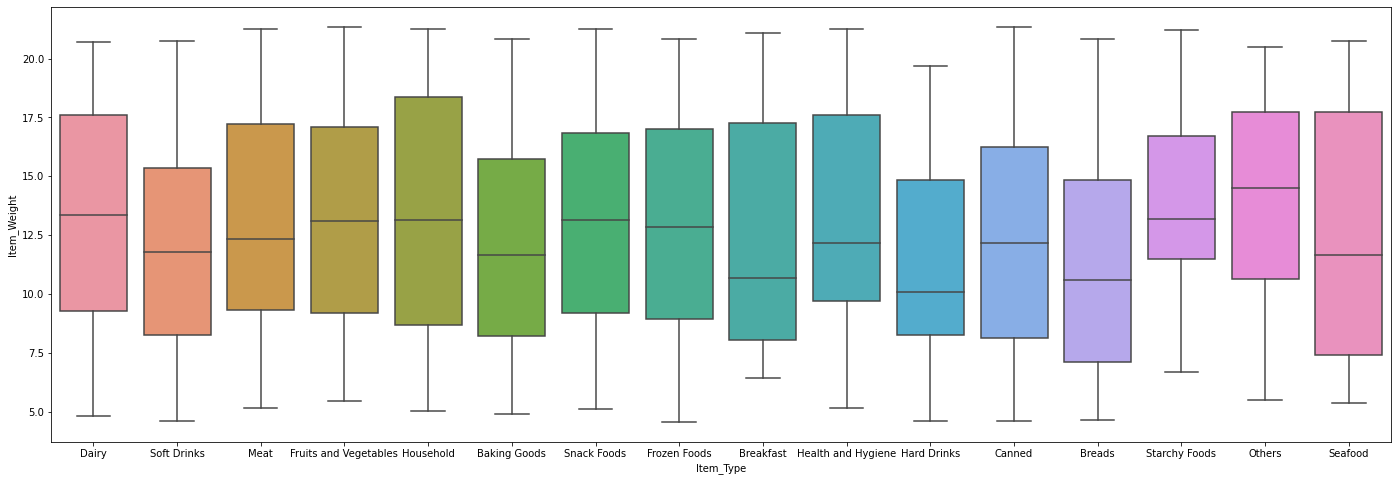

In [205]:
plt.figure(figsize=(24, 8))
sns.boxplot("Item_Type","Item_Weight",data=train)

In [206]:
#scatterplot with dependent vs independent
def scatterplot(df,x,y):
    sns.scatterplot(x,y,data=df)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


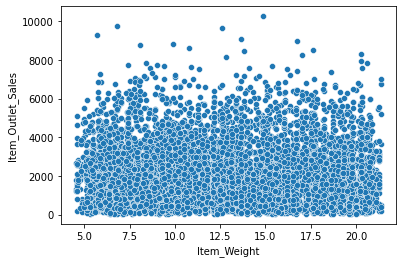

In [207]:
scatterplot(train,"Item_Weight","Item_Outlet_Sales")

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


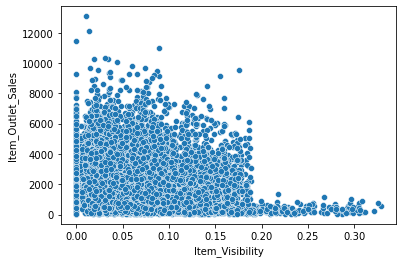

In [208]:
scatterplot(train,"Item_Visibility","Item_Outlet_Sales")

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


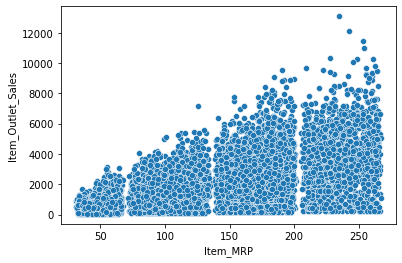

In [209]:
scatterplot(train,"Item_MRP","Item_Outlet_Sales")

In [210]:
def boxplot(df,x,y):
    sns.boxplot(x,y,data=df)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


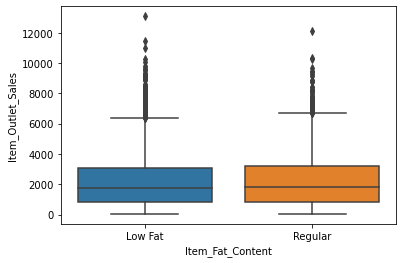

In [211]:
boxplot(train,"Item_Fat_Content","Item_Outlet_Sales")

In [212]:
cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


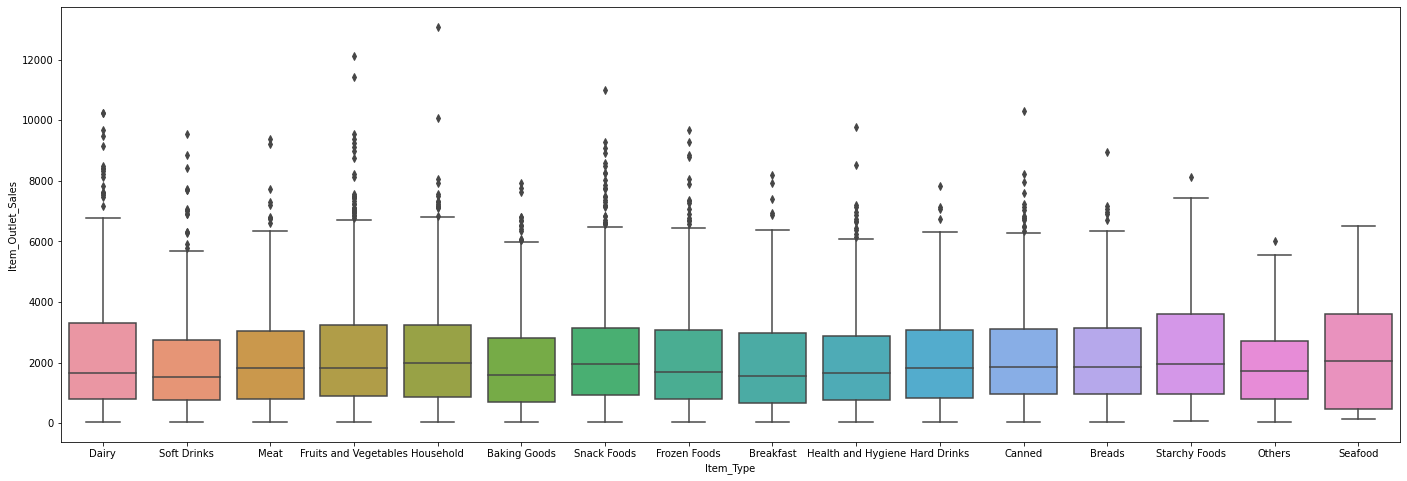

In [213]:
plt.figure(figsize=(24, 8))
boxplot(train,"Item_Type","Item_Outlet_Sales")

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


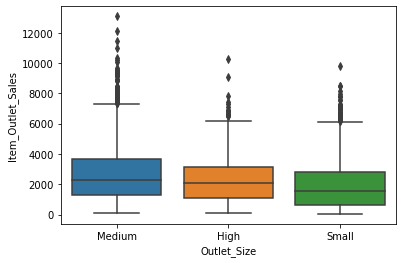

In [214]:
boxplot(train,"Outlet_Size","Item_Outlet_Sales")

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


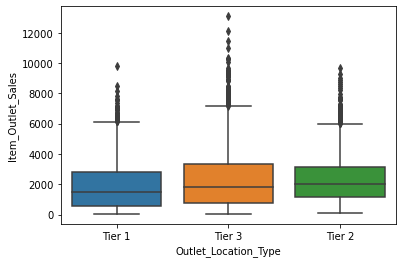

In [215]:
boxplot(train,"Outlet_Location_Type","Item_Outlet_Sales")

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


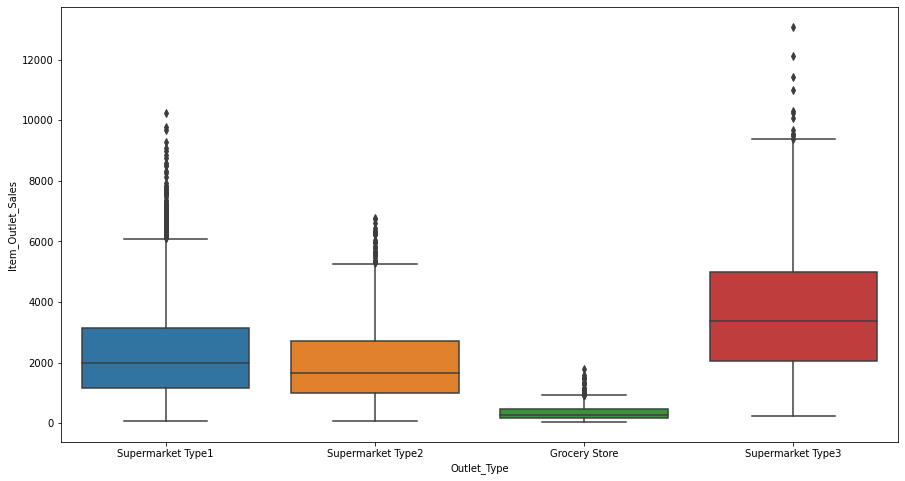

In [216]:
plt.figure(figsize=(15, 8))
boxplot(train,"Outlet_Type","Item_Outlet_Sales")

In [217]:
#function to clean the dataframe
def cleaning(df):
    df.Item_Weight.fillna(df.Item_Weight.median(), inplace=True)
    df.Outlet_Size.fillna(df.Outlet_Size.mode()[0], inplace=True)
    df=df.drop(["Item_Identifier","Outlet_Identifier"],axis=1)
    df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
    df['Outlet_Size'] = df['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})
    df["Item_Visibility*Item_MRP"]= df["Item_Visibility"]*df["Item_MRP"]
    df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})
    df['Outlet_Type'] = df['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1, 'Supermarket Type2':2,'Supermarket Type3':3})
    df['Item_Visibility'] = df['Item_Visibility'].replace(0.000000, df['Item_Visibility'].median())
    df["total_year_of_Outlet_Establishment"]=2021-df["Outlet_Establishment_Year"]
    
    df['Item_Type'] = df['Item_Type'].map({'Dairy':'Unhealthy', 'Soft Drinks':'Unhealthy', 'Meat':'Unhealthy', 'Fruits and Vegetables':'Healthy',
       'Household':'Healthy', 'Baking Goods':'Unhealthy', 'Snack Foods':'Unhealthy', 'Frozen Foods':'Healthy',
       'Breakfast':'Healthy', 'Health and Hygiene':'Healthy', 'Hard Drinks':'Unhealthy', 'Canned':'Unhealthy',
       'Breads':'Healthy', 'Starchy Foods':'Healthy', 'Others':'Others', 'Seafood':'Healthy'})
    df['Item_Type'] = df['Item_Type'].map({'Unhealthy':0,'Healthy':1,'Others':2})
    return df

In [218]:
train=cleaning(train)

In [219]:
X=train.drop(["Item_Outlet_Sales"],axis=1)
y=train[["Item_Outlet_Sales"]]

In [220]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility*Item_MRP,total_year_of_Outlet_Establishment
0,9.30,0,0.016047,0,249.8092,1999,1,0,1,4.008763,22
1,5.92,1,0.019278,0,48.2692,2009,1,2,2,0.930544,12
2,17.50,0,0.016760,0,141.6180,1999,1,0,1,2.373528,22
3,19.20,1,0.053931,1,182.0950,1998,1,2,0,0.000000,23
4,8.93,0,0.053931,1,53.8614,1987,2,2,1,0.000000,34


In [221]:
X.shape

(8523, 11)

In [222]:
X.isna().sum()

Item_Weight                           0
Item_Fat_Content                      0
Item_Visibility                       0
Item_Type                             0
Item_MRP                              0
Outlet_Establishment_Year             0
Outlet_Size                           0
Outlet_Location_Type                  0
Outlet_Type                           0
Item_Visibility*Item_MRP              0
total_year_of_Outlet_Establishment    0
dtype: int64

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_year_of_Outlet_Establishment', ylabel='Item_Outlet_Sales'>

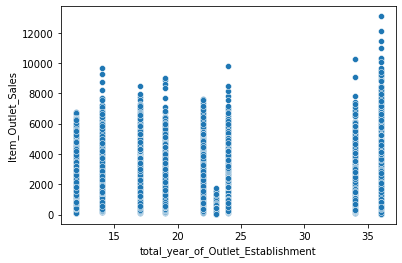

In [223]:
sns.scatterplot(X["total_year_of_Outlet_Establishment"],y["Item_Outlet_Sales"])

In [224]:
test=pd.read_csv("test.csv")

In [225]:
replace(test,"Item_Fat_Content","LF","Low Fat")

In [226]:
replace(test,"Item_Fat_Content","low fat","Low Fat")

In [227]:
replace(test,"Item_Fat_Content","reg","Regular")

In [228]:
test["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [229]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [230]:
test=cleaning(test)

In [231]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility*Item_MRP,total_year_of_Outlet_Establishment
0,20.750,0,0.007565,0,107.8622,1999,1,0,1,0.815960,22
1,8.300,1,0.038428,0,87.3198,2007,1,1,1,3.355497,14
2,14.600,0,0.099575,2,241.7538,1998,1,2,0,24.072612,23
3,7.315,0,0.015388,0,155.0340,2007,1,1,1,2.385724,14
4,12.500,1,0.118599,0,234.2300,1985,1,2,3,27.779517,36
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,1,0.013496,0,141.3154,1997,0,0,1,1.907258,24
5677,7.600,1,0.142991,1,169.1448,2009,1,2,2,24.186167,12
5678,10.000,0,0.073529,1,118.7440,2002,1,1,1,8.731075,19
5679,15.300,1,0.054154,0,214.6218,2007,1,1,1,0.000000,14


In [232]:
test.shape

(5681, 11)

In [233]:
train.isna().sum()

Item_Weight                           0
Item_Fat_Content                      0
Item_Visibility                       0
Item_Type                             0
Item_MRP                              0
Outlet_Establishment_Year             0
Outlet_Size                           0
Outlet_Location_Type                  0
Outlet_Type                           0
Item_Outlet_Sales                     0
Item_Visibility*Item_MRP              0
total_year_of_Outlet_Establishment    0
dtype: int64

In [234]:
def RMSE(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print("RMSE Error:", np.sqrt(mse))

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [237]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection, tree, metrics,svm
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score
from sklearn.preprocessing import Normalizer, StandardScaler
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from lightgbm import LGBMRegressor
from math import sqrt
import warnings

In [238]:
models = []
models.append(('Linear', LinearRegression()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('GB', XGBRegressor()))
models.append(('Forest', RandomForestRegressor()))
models.append(('Light', LGBMRegressor()))
models.append(('ADA', AdaBoostRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('Bayesian RIdge', BayesianRidge()))
models.append(('SVM', svm.SVR()))
models.append(('KNN', KNeighborsRegressor()))


In [239]:

model_comp = pd.DataFrame(columns=['Model', 'RMSE'])


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    model_comp = model_comp.append([{'Model': name, 'RMSE': rmse}])

model_comp

<ipython-input-239-89ec68cae06d>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

,Model,RMSE
0,Linear,1135.610494
0,CART,1508.706388
0,GB,1103.622985
0,Forest,1091.869655
0,Light,1044.854478
0,ADA,1310.796683
0,Ridge,1135.412527
0,Lasso,1135.551578
0,Bayesian RIdge,1135.569826
0,SVM,1670.066053


# using hyperparameter tuning for models showing less RMSE

# random forest

In [240]:
from sklearn.model_selection import RandomizedSearchCV

In [241]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search modelrfr_random.fit(X_train,y_train)
rf_random.fit(X_train,y_train)

print(rf_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [136]:
print(rf_random.best_estimator_)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=400)


In [54]:
model = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=400,min_samples_split= 2,bootstrap= True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_hat=model.predict(X_train)
print("For test data")
RMSE(y_test, y_pred)
print("For train data")
RMSE(y_train, y_hat)

<ipython-input-54-e49daf826e1f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


For test data
RMSE Error: 1018.7660631258072
For train data
RMSE Error: 968.2479053683599


In [55]:
from sklearn.feature_selection import SelectFromModel

In [56]:
model.feature_importances_

array([0.023958  , 0.00431604, 0.06719631, 0.00532091, 0.44609343,
       0.05764437, 0.02222689, 0.02325536, 0.21159656, 0.08199486,
       0.05639727])

<BarContainer object of 11 artists>

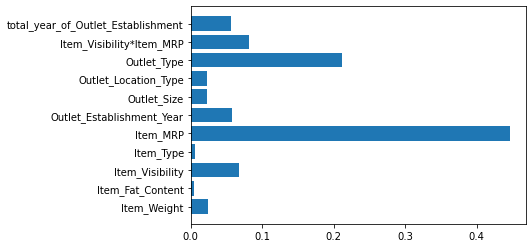

In [57]:
plt.barh(X.columns, model.feature_importances_)

In [61]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Item_MRP
Outlet_Type


In [137]:
from sklearn.ensemble import GradientBoostingRegressor

In [138]:
y_pres_test=model.predict(test)

In [139]:
df=pd.read_csv("test.csv")

In [140]:
data={"Item_Identifier":df["Item_Identifier"],"Outlet_Identifier":df["Outlet_Identifier"],"Item_Outlet_Sales":y_pres_test}

In [141]:
gbr=pd.DataFrame(data)
gbr.to_csv('RFR2.csv')

In [199]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
lb = LGBMRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = lb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search modelrfr_random.fit(X_train,y_train)
rf_random.fit(X_train,y_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bootstrap
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [200]:
print(rf_random.best_estimator_)

LGBMRegressor(bootstrap=True, max_depth=10, max_features='auto',
              min_samples_leaf=4, min_samples_split=5, n_estimators=200)


In [201]:
model = LGBMRegressor(bootstrap=True, max_depth=10, max_features='auto',
              min_samples_leaf=4, min_samples_split=5, n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_hat=model.predict(X_train)
print("For test data")
RMSE(y_test, y_pred)
print("For train data")
RMSE(y_train, y_hat)

For test data
RMSE Error: 1068.1868385479552
For train data
RMSE Error: 816.5740477379824


In [202]:
y_pres_test=model.predict(test)

In [203]:
gbr=pd.DataFrame(data)
gbr.to_csv('lgb2.csv')

In [204]:
from xgboost.sklearn import XGBRegressor
parameters = {
    'max_depth': range (1, 10, 1),
    'n_estimators': range(20, 220, 100),
    'learning_rate': [0.001,0.1, 0.01,0.03, 0.05]
}
rfr_random = RandomizedSearchCV(estimator= XGBRegressor(),param_distributions=parameters, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs=-1)
rfr_random.fit(X_train,y_train)
print(rfr_random.best_estimator_)
print(rfr_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=120, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
{'n_estimators': 120, 'max_depth': 6, 'learning_rate': 0.03}


In [210]:
xgb=XGBRegressor()

In [211]:
# fit the model on the whole dataset
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_hat_xgb=xgb.predict(X_train)
print("For test data")
RMSE(y_test, y_pred_xgb)
print("For train data")
RMSE(y_train, y_hat_xgb)

For test data
RMSE Error: 1103.6229849529093
For train data
RMSE Error: 660.2664875387036


In [214]:
y_pres_test_xgb=xgb.predict(test)

In [217]:
gbr=pd.DataFrame(data)
gbr.to_csv('xgb5.csv')

In [215]:
data={"Item_Identifier":df["Item_Identifier"],"Outlet_Identifier":df["Outlet_Identifier"],"Item_Outlet_Sales":y_pres_test_xgb}

In [219]:
dic1={'criterion': 'mse',
     'max_depth': 5,
      'min_samples_leaf': 5,
      'min_samples_split': 3, 
       'max_leaf_nodes': 46, 
      'max_features': 'log2', 
      'n_estimators': 45,
            
      
     }
rf1= RandomForestRegressor(random_state=46,**dic1)
regr_Ada_withRF = AdaBoostRegressor(rf1,random_state=10,n_estimators=55,learning_rate=0.0003)
regr_Ada_withRF.fit(X_train, y_train)


C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=5,
                                                       max_features='log2',
                                                       max_leaf_nodes=46,
                                                       min_samples_leaf=5,
                                                       min_samples_split=3,
                                                       n_estimators=45,
                                                       random_state=46),
                  learning_rate=0.0003, n_estimators=55, random_state=10)

In [223]:

y_pred = regr_Ada_withRF.predict(X_test)
y_hat=regr_Ada_withRF.predict(X_train)
print("For test data")
RMSE(y_test, y_pred)
print("For train data")
RMSE(y_train, y_hat)

For test data
RMSE Error: 1066.2846052000443
For train data
RMSE Error: 1132.7658879756452


In [228]:
y_pres_test_SDARF=regr_Ada_withRF.predict(test)

In [231]:
gbr=pd.DataFrame(data)
gbr.to_csv('ADARF.csv')

In [178]:
data={"Item_Identifier":df["Item_Identifier"],"Outlet_Identifier":df["Outlet_Identifier"],"Item_Outlet_Sales":y_pres_test_SDARF}

In [138]:
from catboost import CatBoostRegressor

In [242]:
model = CatBoostRegressor()

In [243]:
parameters = {'depth'         : [6,8,10,20,30,40,50],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100,150,200]
                 }


In [244]:
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-3531.17054874 -4528.48177149 -5137.86807352 -3682.7509805
 -4992.04243434 -5363.07663964 -4122.42623624 -5344.64434999
 -5498.95088632 -4507.93296811 -5435.78910844 -5536.83211447
 -4791.61288442 -5479.84265487 -5559.16588093 -3527.48147156
 -4523.20531975 -5159.62814861 -3673.1582453  -5002.87744188
 -5393.23677702 -4103.78373386 -5360.4789187  -5528.35815281
 -4488.37218144 -5464.11204567 -5569.90823633 -4776.77060246
 -5502.50933879 -5597.91098655 -3526.95910911 -4482.01786432
 -5126.45399406 -3670.52342552 -4961.69361351 -5375.7620213
 -4088.98229209 -5347.70988576 -5528.99885356 -4461.95744854
 -5450.41669559 -5578.38182131 -4747.4229708  -5501.56543166
 -5612.83699527            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan          

0:	learn: 1710.6652881	total: 2.98ms	remaining: 86.6ms
1:	learn: 1701.9516951	total: 10.3ms	remaining: 144ms
2:	learn: 1692.6329874	total: 24.1ms	remaining: 217ms
3:	learn: 1683.9826196	total: 44.1ms	remaining: 287ms
4:	learn: 1674.9215801	total: 46.3ms	remaining: 231ms
5:	learn: 1666.0839444	total: 49ms	remaining: 196ms
6:	learn: 1657.1906067	total: 50.7ms	remaining: 166ms
7:	learn: 1648.4527863	total: 60.1ms	remaining: 165ms
8:	learn: 1639.8799987	total: 83ms	remaining: 194ms
9:	learn: 1631.4550004	total: 97.3ms	remaining: 195ms
10:	learn: 1623.0758852	total: 112ms	remaining: 193ms
11:	learn: 1614.8665071	total: 126ms	remaining: 189ms
12:	learn: 1607.0452890	total: 142ms	remaining: 186ms
13:	learn: 1598.8564156	total: 158ms	remaining: 181ms
14:	learn: 1591.8365839	total: 160ms	remaining: 160ms
15:	learn: 1584.1355698	total: 175ms	remaining: 153ms
16:	learn: 1576.3194742	total: 192ms	remaining: 147ms
17:	learn: 1569.0429220	total: 198ms	remaining: 132ms
18:	learn: 1561.3439981	total: 

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001B1923C9730>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10, 20, 30, 40, 50],
                         'iterations': [30, 50, 100, 150, 200],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [245]:

    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
    print("\n The best score across ALL searched params:\n", grid.best_score_)
    print("\n The best parameters across ALL searched params:\n", grid.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 -3526.959109109014

 The best parameters across ALL searched params:
 {'depth': 10, 'iterations': 30, 'learning_rate': 0.01}


In [246]:
model = CatBoostRegressor(depth= 10, iterations=30, learning_rate=0.01)
# Fit model
model.fit(X_train, y_train)
# Get predictions
y_pred_cat = model.predict(X_test)
y_hat_cat=model.predict(X_train)
print("For test data")
RMSE(y_test, y_pred_cat)
print("For train data")
RMSE(y_train, y_hat_cat)

0:	learn: 1710.6652881	total: 2.67ms	remaining: 77.4ms
1:	learn: 1701.9516951	total: 10.3ms	remaining: 144ms
2:	learn: 1692.6329874	total: 24ms	remaining: 216ms
3:	learn: 1683.9826196	total: 39.2ms	remaining: 255ms
4:	learn: 1674.9215801	total: 41.1ms	remaining: 206ms
5:	learn: 1666.0839444	total: 43.6ms	remaining: 174ms
6:	learn: 1657.1906067	total: 45.5ms	remaining: 150ms
7:	learn: 1648.4527863	total: 52.6ms	remaining: 145ms
8:	learn: 1639.8799987	total: 65.5ms	remaining: 153ms
9:	learn: 1631.4550004	total: 78ms	remaining: 156ms
10:	learn: 1623.0758852	total: 90.3ms	remaining: 156ms
11:	learn: 1614.8665071	total: 102ms	remaining: 154ms
12:	learn: 1607.0452890	total: 115ms	remaining: 150ms
13:	learn: 1598.8564156	total: 127ms	remaining: 145ms
14:	learn: 1591.8365839	total: 128ms	remaining: 128ms
15:	learn: 1584.1355698	total: 140ms	remaining: 122ms
16:	learn: 1576.3194742	total: 152ms	remaining: 117ms
17:	learn: 1569.0429220	total: 156ms	remaining: 104ms
18:	learn: 1561.3439981	total:

In [174]:
y_pres_test_SDARF=model.predict(test)

In [179]:
gbr=pd.DataFrame(data)
gbr.to_csv('cat.csv')

In [263]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
gbr=GradientBoostingRegressor()
parameters = {
    "n_estimators":[50,100,150,200,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.001,0.01,0.1,1,10]
}
cv = GridSearchCV(gbr,parameters,cv=3,n_jobs=-1)
cv.fit(X_train,y_train)
print(cv.best_estimator_)
print(cv.best_params_)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ 2.12857964e-002  4.15675372e-002  6.00696925e-002  7.69624894e-002
  9.30251527e-002  1.63297425e-001  4.87794686e-002  9.38589503e-002
  1.34998454e-001  1.72162349e-001  2.06131929e-001  3.37247911e-001
  5.57167024e-002  1.07023541e-001  1.53334497e-001  1.95163110e-001
  2.33007504e-001  3.75056001e-001  5.61702622e-002  1.07705280e-001
  1.54012184e-001  1.95720631e-001  2.33384734e-001  3.73660220e-001
  5.59002226e-002  1.07008484e-001  1.53120515e-001  1.94627253e-001
  2.31970603e-001  3.69923006e-001  1.63854346e-001  2.64967556e-001
  3.34734981e-001  3.86905109e-001  4.26205285e-001  5.18838267e-001
  3.38295628e-001  4.79885046e-001  5.42699499e-001  5.71811975e-001
  5.84496710e-001  5.94839828e-001  3.76039078e-001  5.14012466e-001
  5.64258960e-001  5.83142759e-001  5.89431538e-001  5.88090414e-001
  3.74629829e-001 

GradientBoostingRegressor(n_estimators=50)
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [264]:
model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=50, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_hat=model.predict(X_train)
print("For test data")
RMSE(y_test, y_pred)
print("For train data")
RMSE(y_train, y_hat)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For test data
RMSE Error: 1329.2200314596978
For train data
RMSE Error: 1395.2852586571557


In [136]:
 from sklearn.ensemble import VotingRegressor


In [181]:
r1 = LGBMRegressor(bootstrap=True, max_depth=10, max_features='auto',
              min_samples_leaf=4, min_samples_split=5, n_estimators=200)
r2 = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=400,min_samples_split= 2,bootstrap= True)
r3= GradientBoostingRegressor(learning_rate=0.01, n_estimators=50, max_depth=3)

In [265]:
model = VotingRegressor([('lr', r1), ('rf', r2),('gb', r3) ])


In [266]:
model.fit(X_train, y_train)
# Get predictions
y_pred = model.predict(X_test)
y_hat=model.predict(X_train)
print("For test data")
RMSE(y_test, y_pred)
print("For train data")
RMSE(y_train, y_hat)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: min_samples_split
Learning rate set to 0.054928
0:	learn: 1669.7130753	total: 2.15ms	remaining: 2.15s
1:	learn: 1623.5086551	total: 3.99ms	remaining: 1.99s
2:	learn: 1578.7785700	total: 5.92ms	remaining: 1.97s
3:	learn: 1539.3098955	total: 7.96ms	remaining: 1.98s
4:	learn: 1500.7687168	total: 9.88ms	remaining: 1.97s
5:	learn: 1466.8642805	total: 12ms	remaining: 1.98s
6:	learn: 1434.2149677	total: 13.9ms	remaining: 1.98s
7:	learn: 1405.2758945	total: 16ms	remaining: 1.98s
8:	learn: 1377.7777214	total: 17.9ms	remaining: 1.98s
9:	learn: 1353.5986862	total: 19.9ms	remaining: 1.97s
10:	learn: 1333.7888039	total: 21.1ms	remaining: 1.9s
11:	learn: 1313.4616760	total: 23.1ms	remaining: 1.9s
12:	learn: 1295.0500703	total: 25ms	remaining: 1.9s
13:	learn: 1275.3412326	total: 26.9ms	remaining: 1.89s
1

190:	learn: 1033.5282127	total: 343ms	remaining: 1.45s
191:	learn: 1033.2312023	total: 345ms	remaining: 1.45s
192:	learn: 1032.9261574	total: 347ms	remaining: 1.45s
193:	learn: 1032.5210290	total: 349ms	remaining: 1.45s
194:	learn: 1032.2147506	total: 351ms	remaining: 1.45s
195:	learn: 1032.0219591	total: 353ms	remaining: 1.45s
196:	learn: 1031.7805907	total: 354ms	remaining: 1.44s
197:	learn: 1031.5365498	total: 356ms	remaining: 1.44s
198:	learn: 1031.3081415	total: 358ms	remaining: 1.44s
199:	learn: 1031.0189616	total: 359ms	remaining: 1.44s
200:	learn: 1030.6443691	total: 361ms	remaining: 1.44s
201:	learn: 1030.4001839	total: 363ms	remaining: 1.43s
202:	learn: 1030.2076116	total: 365ms	remaining: 1.43s
203:	learn: 1029.9225413	total: 367ms	remaining: 1.43s
204:	learn: 1029.6323046	total: 368ms	remaining: 1.43s
205:	learn: 1029.1656581	total: 370ms	remaining: 1.43s
206:	learn: 1029.0246172	total: 372ms	remaining: 1.42s
207:	learn: 1028.6247757	total: 374ms	remaining: 1.42s
208:	learn

394:	learn: 970.6227027	total: 702ms	remaining: 1.07s
395:	learn: 970.4053337	total: 704ms	remaining: 1.07s
396:	learn: 970.0911229	total: 706ms	remaining: 1.07s
397:	learn: 969.8729764	total: 707ms	remaining: 1.07s
398:	learn: 969.6558841	total: 709ms	remaining: 1.07s
399:	learn: 969.3469224	total: 711ms	remaining: 1.07s
400:	learn: 969.0318863	total: 713ms	remaining: 1.06s
401:	learn: 968.8417375	total: 714ms	remaining: 1.06s
402:	learn: 968.7705950	total: 716ms	remaining: 1.06s
403:	learn: 968.4269584	total: 718ms	remaining: 1.06s
404:	learn: 968.2393469	total: 720ms	remaining: 1.06s
405:	learn: 968.0763203	total: 721ms	remaining: 1.05s
406:	learn: 967.9289812	total: 723ms	remaining: 1.05s
407:	learn: 967.7611853	total: 725ms	remaining: 1.05s
408:	learn: 967.6265868	total: 727ms	remaining: 1.05s
409:	learn: 967.3786023	total: 729ms	remaining: 1.05s
410:	learn: 967.0840866	total: 730ms	remaining: 1.05s
411:	learn: 966.8069669	total: 732ms	remaining: 1.04s
412:	learn: 966.4700745	tota

599:	learn: 921.5437697	total: 1.06s	remaining: 708ms
600:	learn: 921.1985003	total: 1.06s	remaining: 706ms
601:	learn: 920.9210639	total: 1.06s	remaining: 704ms
602:	learn: 920.7304420	total: 1.07s	remaining: 703ms
603:	learn: 920.5458606	total: 1.07s	remaining: 701ms
604:	learn: 920.4123002	total: 1.07s	remaining: 699ms
605:	learn: 920.2410700	total: 1.07s	remaining: 697ms
606:	learn: 920.1443234	total: 1.07s	remaining: 695ms
607:	learn: 920.0070424	total: 1.07s	remaining: 694ms
608:	learn: 919.7804716	total: 1.08s	remaining: 692ms
609:	learn: 919.6195126	total: 1.08s	remaining: 690ms
610:	learn: 919.4474113	total: 1.08s	remaining: 688ms
611:	learn: 919.2740766	total: 1.08s	remaining: 687ms
612:	learn: 919.0224768	total: 1.08s	remaining: 685ms
613:	learn: 918.8008383	total: 1.09s	remaining: 683ms
614:	learn: 918.7054354	total: 1.09s	remaining: 681ms
615:	learn: 918.5973372	total: 1.09s	remaining: 679ms
616:	learn: 918.4598909	total: 1.09s	remaining: 678ms
617:	learn: 918.0604282	tota

807:	learn: 881.2671883	total: 1.42s	remaining: 338ms
808:	learn: 881.0461711	total: 1.42s	remaining: 336ms
809:	learn: 880.8646096	total: 1.43s	remaining: 335ms
810:	learn: 880.8184812	total: 1.43s	remaining: 333ms
811:	learn: 880.6833454	total: 1.43s	remaining: 331ms
812:	learn: 880.5422931	total: 1.43s	remaining: 329ms
813:	learn: 880.4097860	total: 1.43s	remaining: 327ms
814:	learn: 880.2288147	total: 1.43s	remaining: 326ms
815:	learn: 880.0327283	total: 1.44s	remaining: 324ms
816:	learn: 879.8323916	total: 1.44s	remaining: 322ms
817:	learn: 879.7283050	total: 1.44s	remaining: 320ms
818:	learn: 879.5441413	total: 1.44s	remaining: 319ms
819:	learn: 879.3431208	total: 1.44s	remaining: 317ms
820:	learn: 879.2078095	total: 1.45s	remaining: 315ms
821:	learn: 879.0107513	total: 1.45s	remaining: 313ms
822:	learn: 878.9128641	total: 1.45s	remaining: 312ms
823:	learn: 878.6843518	total: 1.45s	remaining: 310ms
824:	learn: 878.4976047	total: 1.45s	remaining: 308ms
825:	learn: 878.3097807	tota

For test data
RMSE Error: 1036.6949036050435
For train data
RMSE Error: 865.3907613072963


In [267]:
y_pres_test_vot=model.predict(test)

In [268]:
data={"Item_Identifier":df["Item_Identifier"],"Outlet_Identifier":df["Outlet_Identifier"],"Item_Outlet_Sales":y_pres_test_vot}

In [269]:
X_train.shape

(6818, 11)

In [270]:
gbr=pd.DataFrame(data)
gbr.to_csv('vot4.csv')

# using boosting algorithms

In [138]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
gbr=GradientBoostingRegressor()
parameters = {
    "n_estimators":[50,100,150,200,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.001,0.01,0.1,1,10]
}
cv = GridSearchCV(gbr,parameters,cv=3,n_jobs=-1)
cv.fit(X_train,y_train)
print(cv.best_estimator_)
print(cv.best_params_)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ 2.12857964e-002  4.15675372e-002  6.00696925e-002  7.69624894e-002
  9.30251527e-002  1.63297425e-001  4.87794686e-002  9.38589503e-002
  1.34998454e-001  1.72162349e-001  2.06131929e-001  3.37247911e-001
  5.57167329e-002  1.07023483e-001  1.53334570e-001  1.95163573e-001
  2.33007256e-001  3.75055835e-001  5.61697219e-002  1.07703879e-001
  1.54011948e-001  1.95721217e-001  2.33387983e-001  3.73646689e-001
  5.59107321e-002  1.07024155e-001  1.53121105e-001  1.94636160e-001
  2.31981815e-001  3.69940964e-001  1.63854346e-001  2.64967556e-001
  3.34734981e-001  3.86905109e-001  4.26205285e-001  5.18838267e-001
  3.38295628e-001  4.79885046e-001  5.42699499e-001  5.71811975e-001
  5.84480326e-001  5.94787917e-001  3.76038465e-001  5.14014169e-001
  5.64328253e-001  5.83185820e-001  5.89527853e-001  5.87982254e-001
  3.74641643e-001 

GradientBoostingRegressor(n_estimators=50)
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [161]:
model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_hat=model.predict(X_train)
print("For test data")
RMSE(y_test, y_pred)
print("For train data")
RMSE(y_train, y_hat)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For test data
RMSE Error: 1028.039553903137
For train data
RMSE Error: 1068.3170259501705


In [162]:
y_pres_test=model.predict(test)

In [ ]:
y

In [177]:
df=pd.read_csv("test.csv")

In [164]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [165]:
data={"Item_Identifier":df["Item_Identifier"],"Outlet_Identifier":df["Outlet_Identifier"],"Item_Outlet_Sales":y_pres_test}

In [167]:
gbr=pd.DataFrame(data)
gbr.to_csv('gbr2.csv')

# Adaboost

In [168]:
from sklearn.ensemble import AdaBoostRegressor #For Regression
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
 'n_estimators': [50, 100,150,200,250,300,350],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }
pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350]})

In [170]:
pre_gs_inst.best_params_


{'n_estimators': 150, 'loss': 'linear', 'learning_rate': 0.05}

In [171]:
pre_gs_inst.best_estimator_

AdaBoostRegressor(learning_rate=0.05, n_estimators=150)

In [177]:
ada = AdaBoostRegressor(learning_rate=0.05, loss='linear', n_estimators=150)
# fit the model on the whole dataset
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
y_hat_ada=ada.predict(X_train)
print("For test data")
RMSE(y_test, y_pred_ada)
print("For train data")
RMSE(y_train, y_hat_ada)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For test data
RMSE Error: 1167.3748187626777
For train data
RMSE Error: 1208.2238751009


In [178]:
y_pres_test=ada.predict(test)

In [179]:
data={"Item_Identifier":df["Item_Identifier"],"Outlet_Identifier":df["Outlet_Identifier"],"Item_Outlet_Sales":y_pres_test}
ada=pd.DataFrame(data)
ada.to_csv('ada.csv')

# XGBOOST

In [191]:
from xgboost.sklearn import XGBRegressor
parameters = {
    'max_depth': range (1, 10, 1),
    'n_estimators': range(20, 220, 100),
    'learning_rate': [0.001,0.1, 0.01,0.03, 0.05]
}
rfr_random = RandomizedSearchCV(estimator= XGBRegressor(),param_distributions=parameters, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs=-1)
rfr_random.fit(X_train,y_train)
print(rfr_random.best_estimator_)
print(rfr_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=120, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
{'n_estimators': 120, 'max_depth': 5, 'learning_rate': 0.05}


In [192]:
xgb=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=120, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [193]:
# fit the model on the whole dataset
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_hat_xgb=xgb.predict(X_train)
print("For test data")
RMSE(y_test, y_pred_xgb)
print("For train data")
RMSE(y_train, y_hat_xgb)

For test data
RMSE Error: 1043.2103595111391
For train data
RMSE Error: 986.6708957726554


In [194]:
y_pres_test=xgb.predict(test)
data={"Item_Identifier":df["Item_Identifier"],"Outlet_Identifier":df["Outlet_Identifier"],"Item_Outlet_Sales":y_pres_test}
xgb=pd.DataFrame(data)
xgb.to_csv('xgb.csv')